# Fire up graphlab create

In [2]:
import graphlab

# Load some house sales data

In [5]:
sales = graphlab.SFrame('ML/Curso1/home_data.gl')

In [6]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


# Exploring the data for housing sales

In [10]:
graphlab.canvas.set_target('browser')
sales.show(view="Scatter Plot", x="sqft_living", y="price")

Canvas is accessible via web browser at the URL: http://localhost:15350/index.html
Opening Canvas in default web browser.


In [8]:
graphlab.canvas.set_target('ipynb')

In [12]:
sales.show(view='Scatter Plot', x='sqft_living', y='price')

# Create a simple regression model of sqft_living to price

In [22]:
train_data, test_data = sales.random_split(.8, seed=0)

## Build the regression model

In [23]:
sqft_model = graphlab.linear_regression.create(train_data, target='price', features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16469

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 1.004525     | 4351961.342316     | 2326769.625512       | 264032.629865 | 242510.218193   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

## Evaluate the simples model

In [24]:
print test_data['price'].mean()

543054.042563


In [25]:
print sqft_model.evaluate(test_data)

{'max_error': 4145443.5987844095, 'rmse': 255184.161312576}


## Let's show what our predictions look like

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

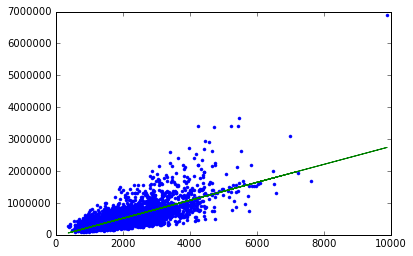

In [27]:
plt.plot(test_data['sqft_living'], test_data['price'], '.', test_data['sqft_living'], sqft_model.predict(test_data), '-')

In [28]:
sqft_model.get('coefficients')

name,index,value,stderr
(intercept),None,-46503.5601155,5081.19482118
sqft_living,None,281.704748365,2.23316912567


# Explore other features in the data

In [29]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [30]:
graphlab.canvas.set_target('browser')
sales[my_features].show()

Canvas is updated and available in a tab in the default browser.


In [31]:
sales.show(view='BoxWhisker Plot', x='zipcode', y='price')

Canvas is updated and available in a tab in the default browser.


# Build a regression model with more features

In [32]:
my_features_model = graphlab.linear_regression.create(train_data, target='price', features = my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16567

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.048042     | 3746967.360903     | 1448997.259527       | 181716.404545 | 188462.098825   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [33]:
print my_features

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


In [34]:
print sqft_model.evaluate(test_data)
print my_features_model.evaluate(test_data)

{'max_error': 4145443.5987844095, 'rmse': 255184.161312576}
{'max_error': 3461643.9361592936, 'rmse': 179481.27189860828}


# Apply learned models to predict prices of 3 houses

In [35]:
house1 = sales[sales['id'] == '5309101200']

In [36]:
house1

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000 |    4     |    2.25   |     2400    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5350   |  1.5   |     0      |  0   |     4     |   7   |    1460    |      940      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1929   |      0       |  98117  | 47.67632376 | -122.37010126 |     1250.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [37]:
print house1['price']

[620000L, ... ]


In [38]:
print sqft_model.predict(house1)

[629587.835960768]


In [39]:
print my_features_model.predict(house1)

[720810.8350683866]


# Prediction for a second, fancier house

In [40]:
house2 = sales[sales['id'] == '1925069082']

In [41]:
house2

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000 |    5     |    4.25   |     4640    |
+------------+---------------------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  22703   |   2    |     1      |  4   |     5     |   8   |    2860    |      1780     |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1952   |      0       |  98052  | 47.63925783 | -122.09722322 |     3140.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [42]:
print sqft_model.predict(house2)

[1260606.472298659]


In [43]:
print my_features_model.predict(house2)

[1439038.048076565]


## Last house, super fancy

In [44]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

In [45]:
print my_features_model.predict(graphlab.SFrame(bill_gates))

[13829883.294466924]


In [46]:
avg_price = sales[sales['zipcode'] == '98039']['price'].mean()

In [47]:
print avg_price

2160606.6


In [49]:
len(sales)

21613

In [50]:
filtered = sales[(sales['sqft_living'] > 2000) & (sales['sqft_living'] <= 4000)]

In [51]:
len(filtered)

9118

In [54]:
float(len(filtered))/len(sales)

0.42187572294452413

In [55]:
train_data, test_data = sales.random_split(.8, seed=0)

In [56]:
advanced_features = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
    'condition', # condition of house
    'grade', # measure of quality of construction
    'waterfront', # waterfront property
    'view', # type of view
    'sqft_above', # square feet above ground
    'sqft_basement', # square feet in basement
    'yr_built', # the year built
    'yr_renovated', # the year renovated
    'lat', 'long', # the lat-long of the parcel
    'sqft_living15', # average sq.ft. of 15 nearest neighbors
    'sqft_lot15' # average lot size of 15 nearest neighbors
]

In [57]:
advanced_features_model = graphlab.linear_regression.create(train_data, target='price', features=advanced_features, validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 127

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.059040     | 3469012.450686     | 154580.940736 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [58]:
my_features_model = graphlab.linear_regression.create(train_data, target='price', features=my_features, validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.038026     | 3763208.270523     | 181908.848367 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [60]:
print(my_features_model)

Class                          : LinearRegression

Schema
------
Number of coefficients         : 115
Number of examples             : 17384
Number of feature columns      : 6
Number of unpacked features    : 6

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 0.055

Settings
--------
Residual sum of squares        : 5.75250973324e+14
Training RMSE                  : 181908.8484

Highest Positive Coefficients
-----------------------------
bathrooms[8]                   : 1741315.8161
zipcode[98039]                 : 1162973.0381
bathrooms[5.75]                : 1145716.2212
bathrooms[6]                   : 1040376.2448
bathrooms[6.25]                : 919328.0218

Lowest Negative Coefficients
----------------------------
be

In [62]:
advanced_features_model

Class                          : LinearRegression

Schema
------
Number of coefficients         : 127
Number of examples             : 17384
Number of feature columns      : 18
Number of unpacked features    : 18

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 0.0766

Settings
--------
Residual sum of squares        : 4.15395325679e+14
Training RMSE                  : 154580.9407

Highest Positive Coefficients
-----------------------------
bathrooms[8]                   : 2149224.5035
bathrooms[5.75]                : 1444157.9772
zipcode[98039]                 : 1111440.6478
bathrooms[6.25]                : 1062933.028
bathrooms[6]                   : 989230.6481

Lowest Negative Coefficients
----------------------------


In [63]:
features_model_rsme = 181908.8484
advanced_features_model_rsme = 154580.9407
print(features_model_rsme-advanced_features_model_rsme)

27327.9077


In [65]:
print my_features_model.evaluate(test_data)

{'max_error': 3486584.509381705, 'rmse': 179542.4333126903}


In [66]:
print advanced_features_model.evaluate(test_data)

{'max_error': 3556849.413858208, 'rmse': 156831.1168021901}


In [70]:
rsme_my_features_model = my_features_model.evaluate(test_data)['rmse']
rsme_advanced_features_model = advanced_features_model.evaluate(test_data)['rmse']
print(rsme_my_features_model-rsme_advanced_features_model)

22711.3165105
